<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах(м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Изучение данных из файла

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Обзор данных

In [2]:
# загружаем файл с данными
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except FileNotFoundError:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [8]:
len(data[data['rooms']==0])

197

### Вывод

1. Дубликатов нет.
2. Очень много пропусков по разным столбцам, будем разбираться.
3. Нужно поправить названия столбцов.
4. 'is_apartment' приведем к значениям 0 и 1.
5. Максимальная площадь в 900 кв.м кажется нереальной.
6. Высота потолка в 100 м что-то нереальное.
7. Нулевые значения расстояния до аэропорта и прудов кажутся подозрительными. Скорее всего, этого просто рядом нет.
8. Дату публикации нужно привезти в формату datetime.
9. Квартиры с ноль комнат. Одна комната точно должна быть.



## Предобработка данных

In [9]:
# переименуем столбец к правильному названию
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})

In [10]:
# приведем столбец к формату datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [11]:
# уйдем от безкомнатных квартир
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [12]:
# посмотрим на объект-великана
data[data['ceiling_height'] == data['ceiling_height'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [13]:
#скорее всего произошла ошибка и заменим высоту на медиану
data.iloc[22869, 5] = data['ceiling_height'].median()

In [14]:
# посмотрим на количество пропусков
data.isnull().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [15]:
# обработаем пропуски и форматы столбцов
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].isna().sum()

0

In [16]:
# balcony - здесь если не указано, значит скорее всего балкона нет
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)
data['balcony'].isna().sum()

0

In [17]:
# Высоту потолка заполним медианой, чтобы возможные выбросы не искажали заполняемые значения.
# Оставим float так как значения высоты с плавающей точкой. 
data.loc[data['ceiling_height'].isna(), ['ceiling_height']] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

In [18]:
#заменим пропущенные значения площади кухни через коеффициент площади кухни от общей площади
koef_kitchen = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'] = data['living_area'].fillna(data['total_area'] * koef_kitchen)
data['kitchen_area'].isna().sum()

0

In [19]:
#заменим пропущенные значения жилой площади через коеффициент жилой площади от общей площади
koef_live = data['living_area'].median() / data['total_area'].median()
data['living_area'] = data['living_area'].fillna(data['total_area'] * koef_live)
data['living_area'].isna().sum()

0

In [20]:
# посмотрим уникальные значения 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
# количество уникальных локаций
data['locality_name'].nunique()

364

In [22]:
#видим, что есть "поселок" и "посёлок". Приведем к одному написанию
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [23]:
#проверим, что это помогло избавиться от неявных дублей
data['locality_name'].nunique()

330

In [24]:
# взглянем на предобработанную таблицу с данными
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,51.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,18.600,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,34.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,91.730769,9,False,...,27.825,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,32.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,14.400,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,...,10.600,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,41.307692,22,False,...,12.530,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,15.430,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,43.600,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод**  
Была произведена предобработка данных.  
Были заменены пропуски и изменены типы данных.  
Данные пропуски могли возникнуть при заполнении пользователем, например опечатки. Возможно пользователь просто счел просто не все данные заполнять.  
Высота потолков была заменена медианным значением чтобы выбросы не сильно влияли на наш анализ.  
Были заменены пропуски в столбцах living_area и kitchen_area. Данные пропуски заполнялись через медианные коэффициенты пропорционально всей площади квартиры.  
Пропуски по кол-ву балконов заменил на ноль, т. к. если их не указывают - значит их нет.  
Удалил неявные пропуски.  

## Расчёты и добавление результатов в таблицу

In [25]:
# добавим цену квадратного метра
data['price_m2'] = (data['last_price'] / data['total_area']).astype(int)

In [26]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,91.730769,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,...,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,41.307692,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524


In [27]:
# добавим день недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [28]:
# добавим этаж квартиры: варианты — первый, последний, другой
data['floor_kat'] = 'другой'
data.loc[data['floor'] == 1, 'floor_kat'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_kat'] = 'последний'

In [29]:
# добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_koef'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_koef'] = round(data['kitchen_area'] / data['total_area'], 2)

## Исследовательский анализ данных

In [30]:
# посмотрим детально параметры: площадь, цена, цена за м2, количество комнат, высота потолков
data[['total_area', 'last_price', 'price_m2', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,price_m2,rooms,ceiling_height,days_exposition
count,23699.000000,2.369900e+04,2.369900e+04,23699.000000,23699.000000,20518.000000
mean,60.348651,6.541549e+06,9.942121e+04,2.078948,2.720251,180.888634
std,35.654083,1.088701e+07,5.030681e+04,1.066196,0.759881,219.727988
min,12.000000,1.219000e+04,1.110000e+02,1.000000,1.000000,1.000000
25%,40.000000,3.400000e+06,7.658500e+04,1.000000,2.600000,45.000000
50%,52.000000,4.650000e+06,9.500000e+04,2.000000,2.650000,95.000000
75%,69.900000,6.800000e+06,1.142560e+05,3.000000,2.700000,232.000000
max,900.000000,7.630000e+08,1.907500e+06,19.000000,32.000000,1580.000000


In [31]:
# напишем функцию для построения гистрограмм по вводным данным
def draw_hist(data, column, bins, min_range, max_range, axes_row, axes_col, title, xlabel, ylabel):
    axes[axes_row][axes_col].hist(data[column], bins=bins, range=(min_range, max_range))
    axes[axes_row][axes_col].set(title=title)
    axes[axes_row][axes_col].set(xlabel=xlabel)
    axes[axes_row][axes_col].set(ylabel=ylabel)

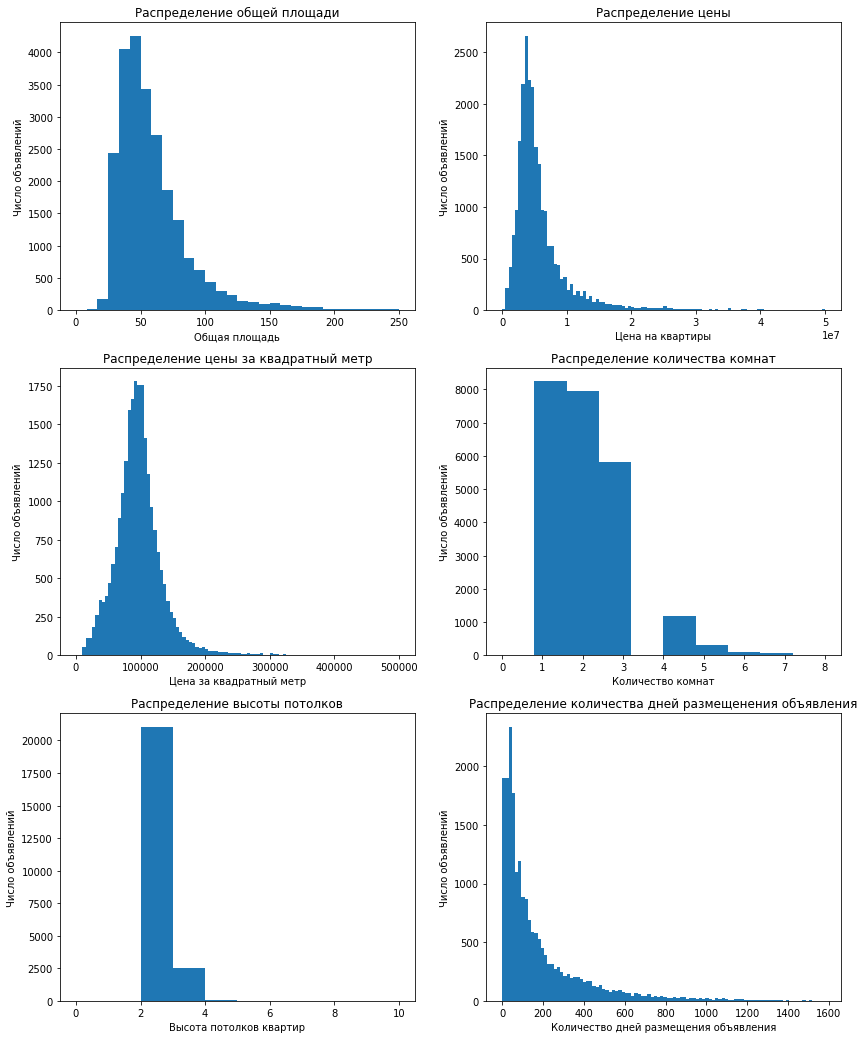

In [32]:
# построим гитограммы для параметров

fig, axes = plt.subplots(3, 2)

fig.set_figwidth(14)
fig.set_figheight(18)

# стоим гистограмму общей площади
draw_hist(data, 'total_area', 30, 0, 250, 0, 0,
          'Распределение общей площади', 'Общая площадь', 'Число объявлений')

# стоим гистограмму цены цены на момент снятия с публикации
draw_hist(data, 'last_price', 100, 0, 50000000, 0, 1,
          'Распределение цены', 'Цена на квартиры', 'Число объявлений')

# стоим гистограмму цены за квадратный метр
draw_hist(data, 'price_m2', 100, 0, 500000, 1, 0,
          'Распределение цены за квадратный метр', 'Цена за квадратный метр', 'Число объявлений')

# стоим гистограмму числа комнат
draw_hist(data, 'rooms', 10, 0, 8, 1, 1,
          'Распределение количества комнат', 'Количество комнат', 'Число объявлений')

# стоим гистограмму высоты потолков 
draw_hist(data, 'ceiling_height', 10, 0, 10, 2, 0,
          'Распределение высоты потолков', 'Высота потолков квартир', 'Число объявлений')

# стоим гистограмму количества дней размещенения объявления
draw_hist(data, 'days_exposition', 100, 0, 1580, 2, 1,
          'Распределение количества дней размещенения объявления',
          'Количество дней размещения объявления', 'Число объявлений')

In [33]:
# посчитаем среднее
data['days_exposition'].mean()

180.88863436982163

In [34]:
# посчитаем медиану
data['days_exposition'].median()

95.0

В среднем квартиры продаются за 6 месяцев, медианное значение 3 месяца. Такая разница из-за имеющихся выбросов (например, 1580 дней по прадаже). Будем считать, что продажи прошли очень быстро если сделка прошла менее чем за 45 дней, а необычно долго - больше чем за 365 дней.

**Уберем редкие и выбивающиеся значения. Построим новые диаграммы.**

In [35]:
# напишем функцию для определения минимальных и максимальных границ через межквартильный размах
def set_limit(data, column, type_limit):
    # расчёт межквартильного размаха
    quart = data[column].quantile(.75) - data[column].quantile(.25)
    if type_limit == 'low':
        return data[column].quantile(.25) - quart * 1.5
    elif type_limit == 'high':
        return data[column].quantile(.75) + quart * 1.5
    

In [36]:
# найдем новые границы
max_total_area = set_limit(data, 'total_area', 'high')
min_total_area = set_limit(data, 'total_area', 'low')

max_price = set_limit(data, 'last_price', 'high')
min_price = set_limit(data, 'last_price', 'low')

max_rooms = set_limit(data, 'rooms', 'high')
min_rooms = set_limit(data, 'rooms', 'low')

max_height = set_limit(data, 'ceiling_height', 'high')
min_height = set_limit(data, 'ceiling_height', 'low')

max_time = set_limit(data, 'days_exposition', 'high')
min_time = set_limit(data, 'days_exposition', 'low')

In [37]:
# сформируем "хорошую" выборку без выбросов
good_data = data.query('@max_total_area > total_area > @min_total_area &' 
                                   '@max_price > last_price > @min_price &'
                                   '@max_rooms > rooms > @min_rooms &'
                                   '@max_height > ceiling_height > @min_height &'
                                   '@max_time > days_exposition > @min_time'
                                  )
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_kat,living_area_koef,kitchen_area_koef
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.46,0.46
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,55.0,95065,0,9,2018,другой,0.47,0.47
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,155.0,99195,3,11,2017,другой,0.28,0.28
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,189.0,87454,2,5,2018,другой,0.47,0.47
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.71,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.00,2017-12-16,1,2.65,9.0,20.00,6,False,...,0.0,NaN,38.0,82051,5,12,2017,другой,0.51,0.51
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.00,2,False,...,0.0,NaN,15.0,105769,3,7,2018,другой,0.60,0.60
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.50,4,False,...,NaN,NaN,413.0,45000,4,7,2017,другой,0.58,0.58
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,False,...,1.0,675.0,239.0,73717,4,8,2016,другой,0.64,0.64


In [38]:
#посмотрим описательные характеристики
good_data[['total_area', 'last_price', 'price_m2', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,price_m2,rooms,ceiling_height,days_exposition
count,16061.000000,1.606100e+04,16061.000000,16061.000000,16061.000000,16061.000000
mean,50.722838,4.550781e+06,90679.316917,1.850009,2.629676,123.208268
std,16.683436,1.995701e+06,28074.812798,0.843910,0.078818,118.464992
min,12.000000,1.219000e+04,111.000000,1.000000,2.460000,1.000000
25%,38.000000,3.200000e+06,74333.000000,1.000000,2.600000,39.000000
50%,46.500000,4.200000e+06,91447.000000,2.000000,2.650000,78.000000
75%,60.700000,5.500000e+06,107049.000000,2.000000,2.650000,174.000000
max,114.500000,1.188000e+07,292307.000000,5.000000,2.850000,512.000000


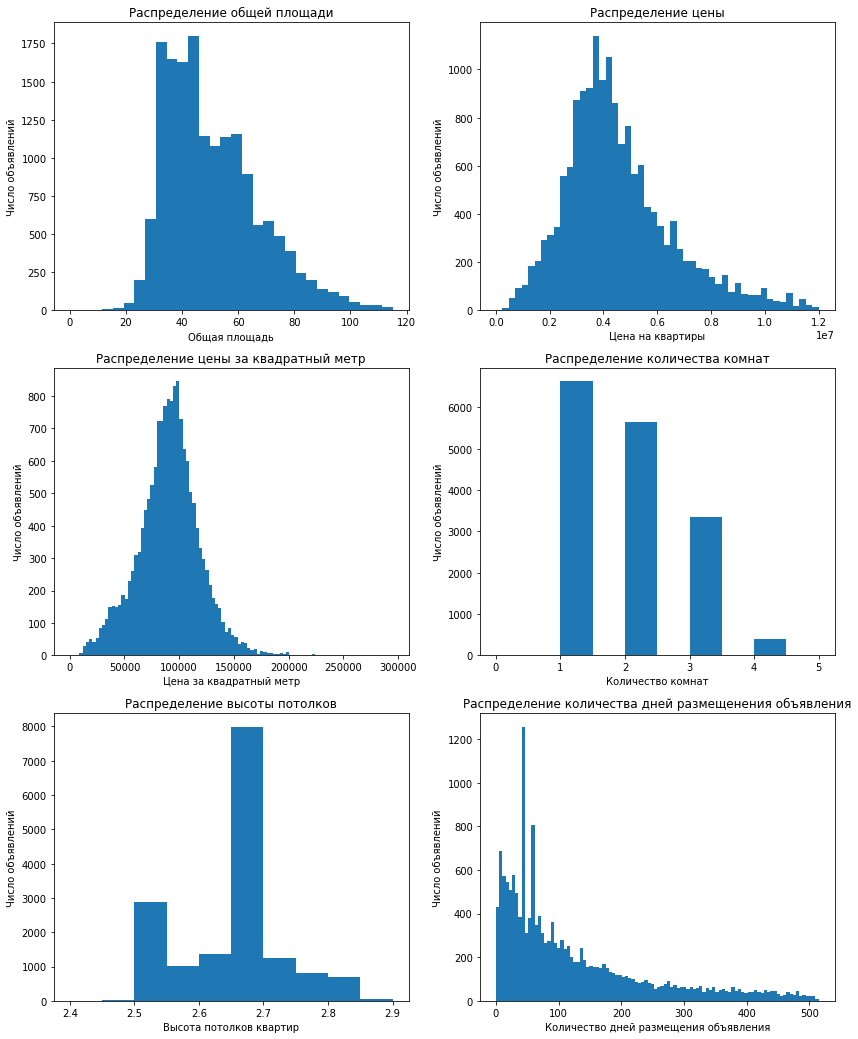

In [39]:
# построим гитограммы для параметров для очищенных от выбросов данных

fig, axes = plt.subplots(3, 2)

fig.set_figwidth(14)
fig.set_figheight(18)

# стоим гистограмму общей площади
draw_hist(good_data, 'total_area', 30, 0, 115, 0, 0,
          'Распределение общей площади', 'Общая площадь', 'Число объявлений')

# стоим гистограмму цены цены на момент снятия с публикации
draw_hist(good_data, 'last_price', 50, 0, 12000000, 0, 1,
          'Распределение цены', 'Цена на квартиры', 'Число объявлений')

# стоим гистограмму цены за квадратный метр
draw_hist(good_data, 'price_m2', 100, 0, 295000, 1, 0,
          'Распределение цены за квадратный метр', 'Цена за квадратный метр', 'Число объявлений')

# стоим гистограмму числа комнат
draw_hist(good_data, 'rooms', 10, 0, 5, 1, 1,
          'Распределение количества комнат', 'Количество комнат', 'Число объявлений')

# стоим гистограмму высоты потолков 
draw_hist(good_data, 'ceiling_height', 10, 2.4, 2.9, 2, 0,
          'Распределение высоты потолков', 'Высота потолков квартир', 'Число объявлений')

# стоим гистограмму количества дней размещенения объявления
draw_hist(good_data, 'days_exposition', 100, 0, 515, 2, 1,
          'Распределение количества дней размещенения объявления',
          'Количество дней размещения объявления', 'Число объявлений')

In [40]:
# получим новое значение среднего
good_data['days_exposition'].mean()

123.2082684764336

In [41]:
# получим новое значение медианы
good_data['days_exposition'].median()

78.0

Были удалены выбросы. Получили новые среднее и медиану. Их значения уменьшились. Разница между ними стала меньше.
Была сформирована новая очищенная база данных, включающие не все объявления, но зато эти объявления имеют статистически нормальные данные. 


Наибольшая общая площадь  в пределах 40-45 кв. м, цена продажи на уровне от 3 до 5 млн, по количеству комнат преобладают 1-комнатные квартиры, высота потолков на уровне 2,65 - 2,7 м.

**Посмотрим зависимость цены от факторов: от площади, числа комнат, удалённости от центра**

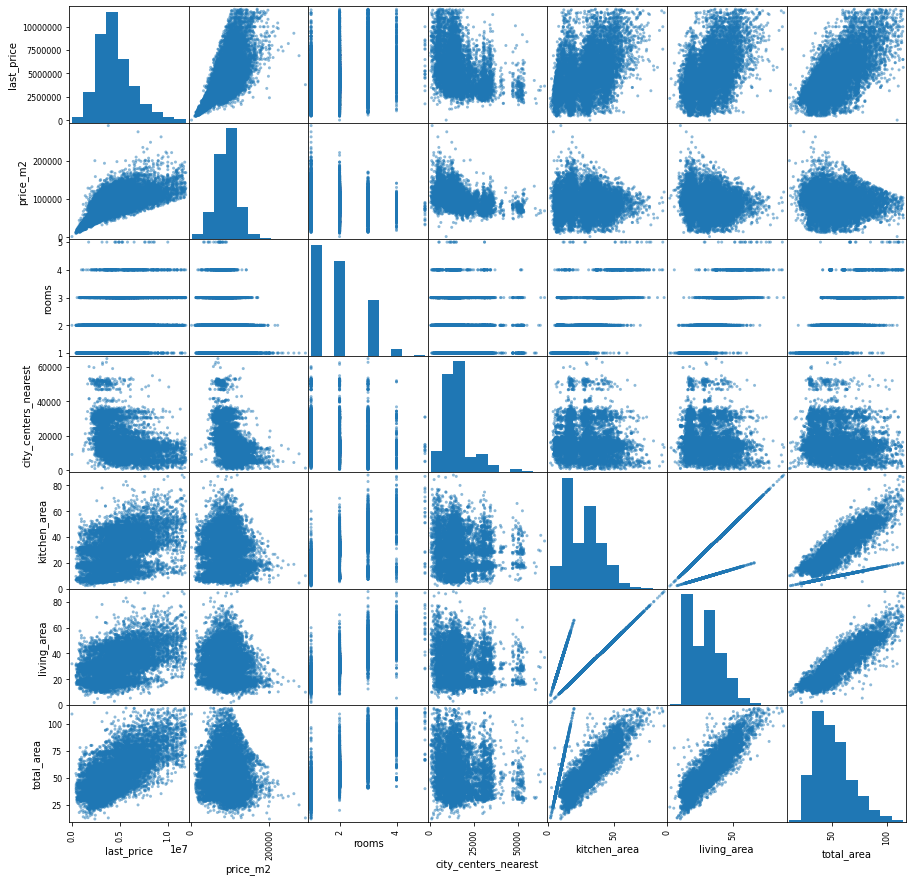

In [42]:
# Построем график корреляции
corr_data = (good_data[['last_price', 'price_m2',
                       'rooms', 'city_centers_nearest', 'kitchen_area', 'living_area', 'total_area']])
pd.plotting.scatter_matrix(corr_data, figsize=(15, 15))
plt.show()

<AxesSubplot:>

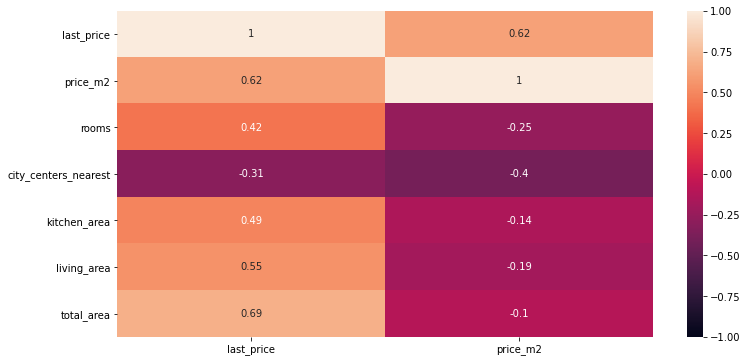

In [43]:
# Построим таблицу корреляции
plt.figure(figsize = (12,6))
sns.heatmap(corr_data.corr()[['last_price','price_m2']], vmin=-1, vmax=1, annot=True)

Имеем сильную корреляцию между ценой за м2 и стоимостью квартирыб, что вполне логично.
Видим прямую зависимость между стоимостью квартиры и площадями: общей, жилой и кухонной. Цена квадратный метр имеет свойство снижаться при повышении площадей.  
Чем больше комнат, тем цена за м2 падает, количество комнат и стоимость квартиры имеет положительную зависимость.
Что касается расстояния до центра, то тут выраженная обратная зависимость - чем меньше расстояние до центра тем выше стоимость квартиры и выше цена за м2.

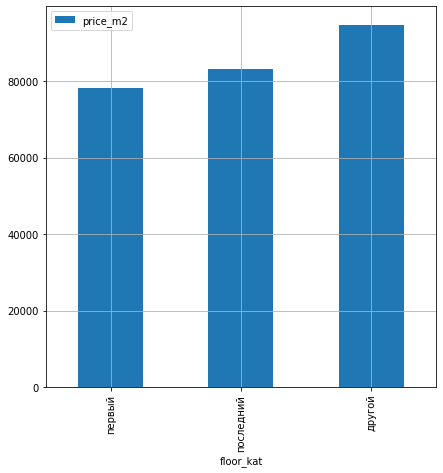

In [44]:
# Посмотрим зависимость стоимости квартиры (за м2) от этажа (первый этаж, последний, другой)
(good_data.pivot_table(index = 'floor_kat', values = 'price_m2', aggfunc='median')
    .sort_values(by='price_m2')
    .plot(y='price_m2', kind = 'bar', figsize=(7,7), grid=True))
plt.show()

Цена на квартиры на первым этаже ниже всего - это понятноб первый этаж не комфортен для проживания, прохожим видно, что за окнами, нужно ставить решетки от грабителей, слышны сторонние шумы с подъезда.    
Стоимость квартиры на верхних этажах тоже не самая высокая, есть риск протекания крыши, фактор боязни высоты, шум от лифтовых механизмов с чердака.   
Промежуточные этажи дороже всего, т.к. имеют больший спрос.

In [45]:
# посмотрим зависимость цены от даты размещения: год, месяц и дня недели:
# напишем функцию для построения

def plot_bar(data, x_col):
    (data.pivot_table(index = x_col, values = 'price_m2', aggfunc='median')
    .sort_values(by='price_m2')
    .plot(y='price_m2', kind = 'bar', figsize=(7,7), grid=True))
    plt.show()

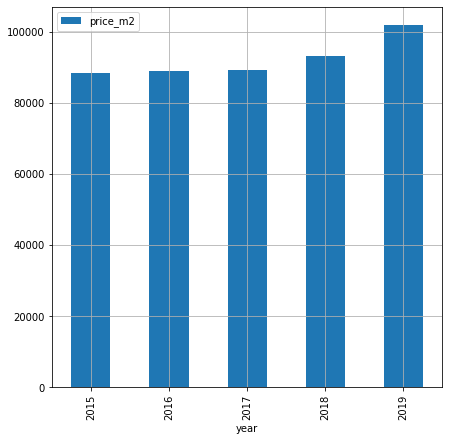

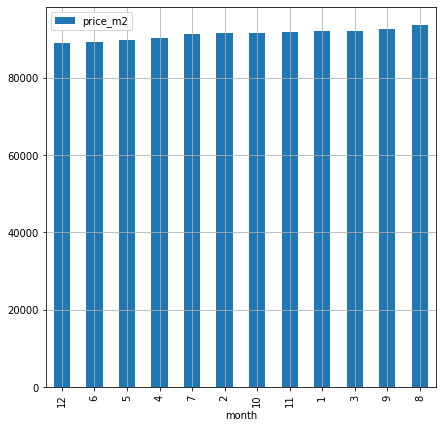

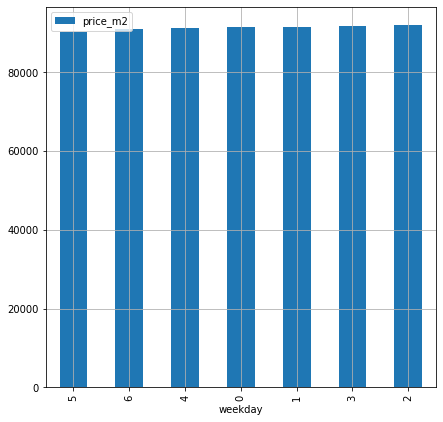

In [46]:
# построим графики
x_col = ['year', 'month', 'weekday']
for col in x_col:
    plot_bar(good_data, col)

В 2019 году цена на квартиры была самой большой. C каждым годом цена за м2 росла, а к 2019 году был довольно заметный скачек.
Повышение цен на квартиры заметнее всего в августе месяце.
По дням недели особо разницы нет, можно отметить, что цены немного выше на квартиры в середине недели, на выходных чуть ниже.

**Исследуем топ-10 населенных пунктов

In [47]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
top_10 = (good_data.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc = ['count', 'median'])
                    .sort_values(by = ('count', 'price_m2'), ascending = False).head(10))
top_10.columns = ['count', ' median_price_m2']
top_10

,count,median_price_m2
locality_name,,
Санкт-Петербург,10042,100588.0
поселок Мурино,513,86268.0
поселок Шушары,382,75837.0
Всеволожск,294,65538.0
поселок Парголово,286,91289.0
Колпино,275,73913.0
деревня Кудрово,265,92089.0
Пушкин,232,97358.5
Гатчина,227,66666.0


Санкт-Петербург -  город на первом месте по количеству объявлений, а также по стоимости жилья за кв. метр.  
Выборг на последнем месте в топ 10 по кол-ву объявлений, а также самый дешевый по стоимости жилья за кв. метр.

**Посмотрим на изменение цены по степени удаленности от центра**

In [48]:
# выберем все объявления в СПБ
data_spb = good_data.query('locality_name == "Санкт-Петербург"')

In [49]:
# создадим новый столбец с округленным расстоянием до центра
data_spb['center_dist'] = round(data_spb['city_centers_nearest']/1000, 0)

In [50]:
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_kat,living_area_koef,kitchen_area_koef,center_dist
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,289.0,88524,6,2,2017,другой,0.71,0.71,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,553.0,137.0,127525,3,11,2017,другой,0.51,0.51,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,...,296.0,19.0,119230,5,11,2017,другой,0.53,0.53,14.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,NaN,168.0,104838,4,1,2017,другой,0.63,0.63,11.0
21,13,3200000.0,31.6,2018-03-14,1,2.65,5.0,16.9,2,False,...,NaN,310.0,101265,2,3,2018,другой,0.53,0.53,10.0


In [51]:
#Посчитаем цену за м2 каждого км:
data_spb['price_km'] = round(data_spb['price_m2'] / data_spb['center_dist'], 0)

In [52]:
# Посчитем среднюю цену для каждого километра
price_km_median = data_spb.pivot_table(index = 'center_dist', values = 'price_m2', aggfunc='median').reset_index()

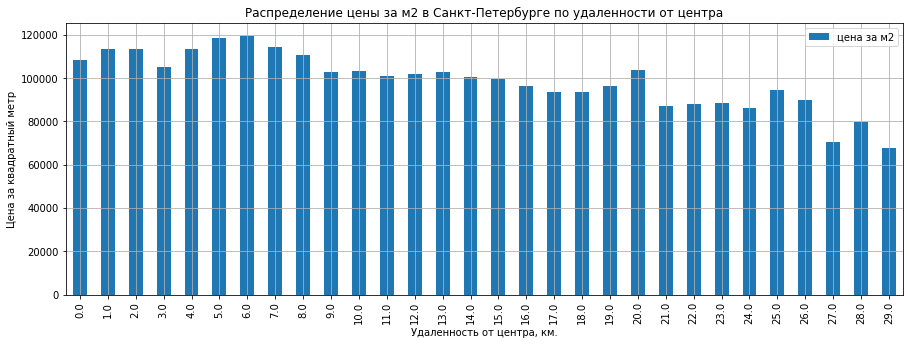

In [53]:
# строим график отношения средней цены от удаленности от центра
price_km_median.plot(x = 'center_dist', y = 'price_m2', label = 'цена за м2', kind = 'bar', figsize = (15,5))
plt.title('Распределение цены за м2 в Санкт-Петербурге по удаленности от центра')
plt.grid(True)
plt.xlabel('Удаленность от центра, км.')
plt.ylabel('Цена за квадратный метр')
plt.show()

Самая большая стоимость за кв. метр находится в пределах 8 км, будем считать это центральной зоной. После 8 км наблюдается небольшой скачок вниз по цене, и монотонное убвание с 2мя скачками в цене (на 20 и на 25 км) - возможно там находтся каки-нибудь элитные дорогие ЖК.

**Проанализируем центральную территорию города**

In [54]:
# Выделим центральную часть города
spb_center = data_spb.query('center_dist <= 8')

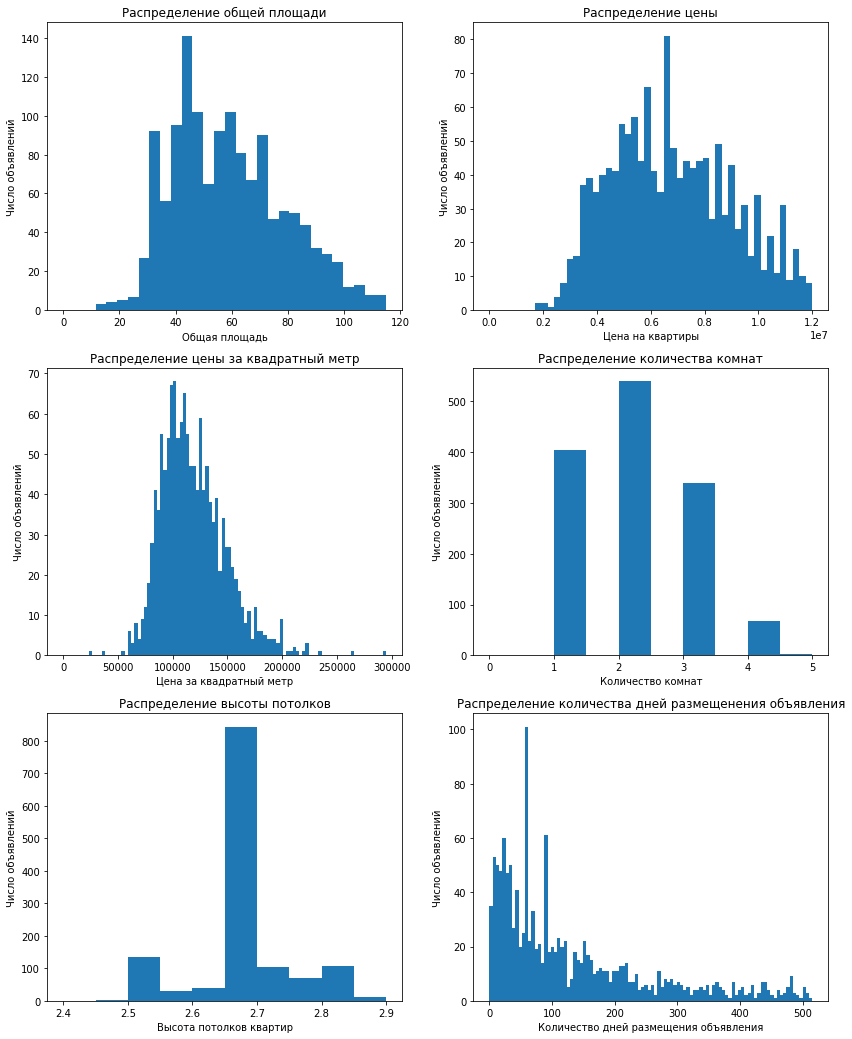

In [55]:
# построим гитограммы

fig, axes = plt.subplots(3, 2)

fig.set_figwidth(14)
fig.set_figheight(18)

# стоим гистограмму общей площади
draw_hist(spb_center, 'total_area', 30, 0, 115, 0, 0,
          'Распределение общей площади', 'Общая площадь', 'Число объявлений')

# стоим гистограмму цены цены на момент снятия с публикации
draw_hist(spb_center, 'last_price', 50, 0, 12000000, 0, 1,
          'Распределение цены', 'Цена на квартиры', 'Число объявлений')

# стоим гистограмму цены за квадратный метр
draw_hist(spb_center, 'price_m2', 100, 0, 295000, 1, 0,
          'Распределение цены за квадратный метр', 'Цена за квадратный метр', 'Число объявлений')

# стоим гистограмму числа комнат
draw_hist(spb_center, 'rooms', 10, 0, 5, 1, 1,
          'Распределение количества комнат', 'Количество комнат', 'Число объявлений')

# стоим гистограмму высоты потолков 
draw_hist(spb_center, 'ceiling_height', 10, 2.4, 2.9, 2, 0,
          'Распределение высоты потолков', 'Высота потолков квартир', 'Число объявлений')

# стоим гистограмму количества дней размещенения объявления
draw_hist(spb_center, 'days_exposition', 100, 0, 515, 2, 1,
          'Распределение количества дней размещенения объявления',
          'Количество дней размещения объявления', 'Число объявлений')

В центре Санкт-Петербурга преобладают 2 комнатные квартиры с высото потолка 2.65 м.  
Самые продаваемые квартиры общей площадью порядка 40м2.  
Цены в центре выше чем других районах.

Выделим факторы, которые могут влиять на стоимость квартиры в центре Санкт-Петербурга: число комнат, этаж, удаленность от центра, дата размещения объявления

In [56]:
center_list_plot = ['rooms', 'center_dist', 'floor_kat']

In [57]:
def plot_price(data, column, kind='scatter'):
    data.plot(x=column, y='price_m2', kind=kind, figsize = (14, 6)) 
    plt.title(f'Распределение цены за кв. м по {column}')
    plt.show()

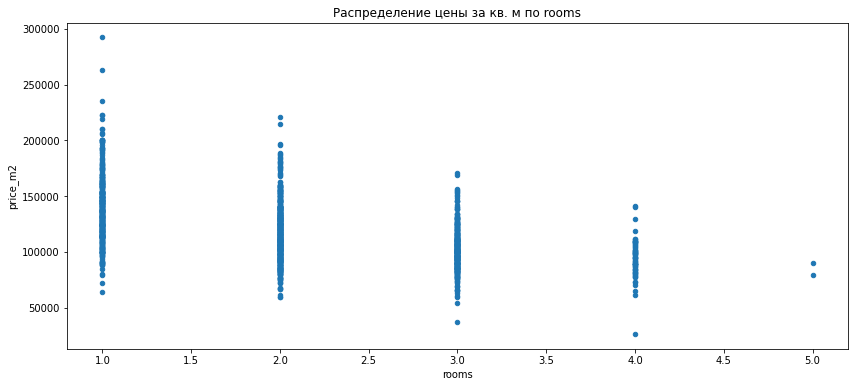

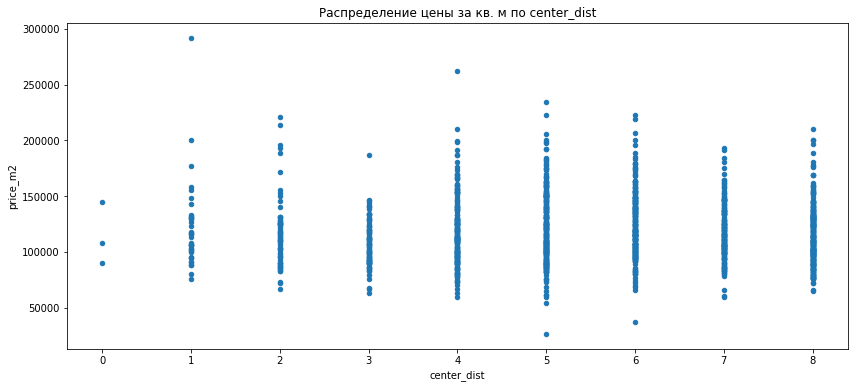

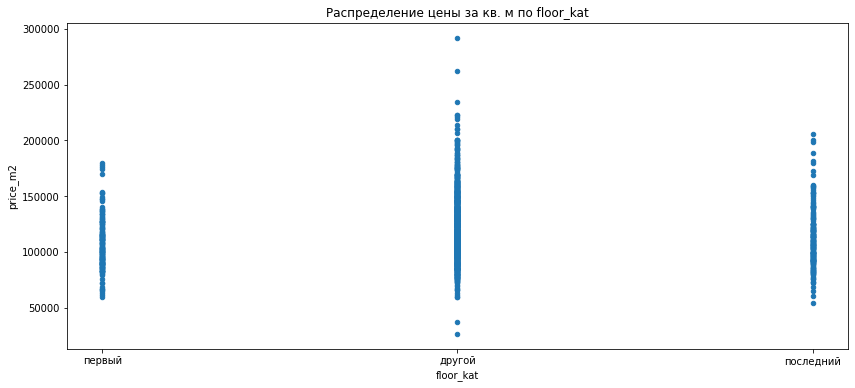

In [58]:
for col in center_list_plot:
    plot_price(spb_center, col)

In [59]:
spb_center_cut = spb_center[['price_m2', 'rooms', 'center_dist', 'floor_kat']]

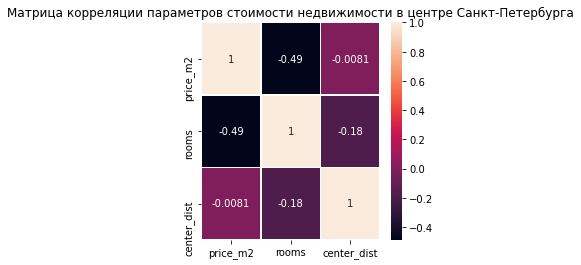

In [60]:
# график для прямой связи между переменными
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(spb_center_cut.corr(), linewidths=.3, ax=ax, annot = True)
plt.title('Матрица корреляции параметров стоимости недвижимости в центре Санкт-Петербурга')
plt.show()

Вывод: имеем прямую зависимость цены за кв.м от кол-ва комнат в квартире и обратную зависиомсть в меньшей степени от удаленности от центра.

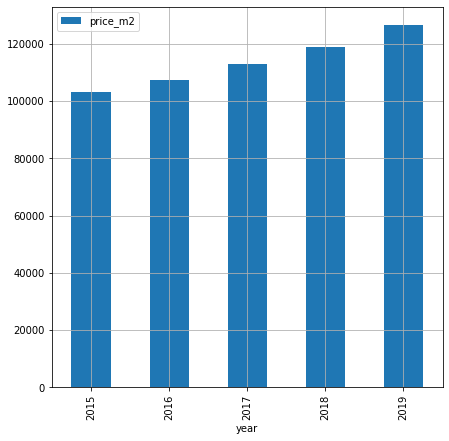

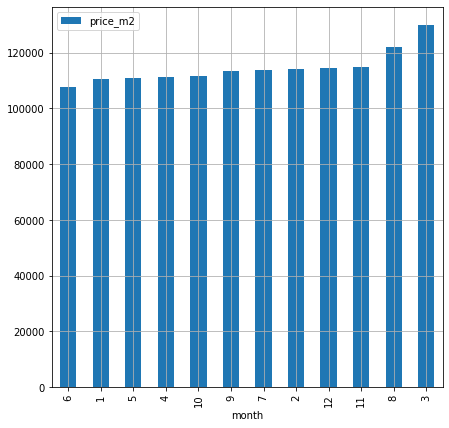

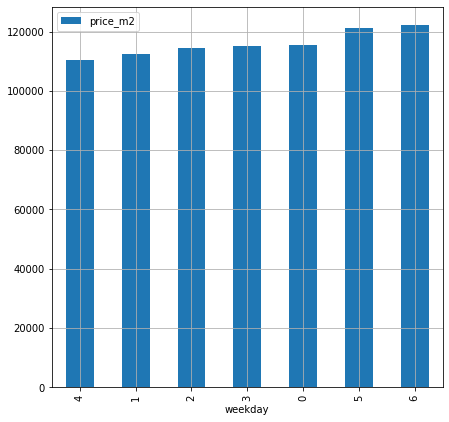

In [61]:
# построим графики зависимости от даты размещения
x_col = ['year', 'month', 'weekday']
for col in x_col:
    plot_bar(spb_center, col)

**Проведем сравнение показателей по всем данным и по центральной зоне.**

In [62]:
# Напишем функцию построения графиков сравнения.
def compare(column):
        
    ax = data_spb.plot(x = column, y = 'price_m2', 
                       label="Все данные по Санкт-Петербургу", 
                       kind = 'scatter', figsize = (12,6),
                      alpha = 0.3)
    spb_center.plot(x = column, y = 'price_m2', ax=ax, 
                    label="Центральная зона Санкт-Петербурга", 
                    kind = 'scatter', color = 'red',
                   alpha = 0.3)

    plt.legend()
    plt.title(f'Зависимость цены от {column}')
    plt.xlabel(column)
    plt.ylabel('стоимость за м2')
    plt.show()

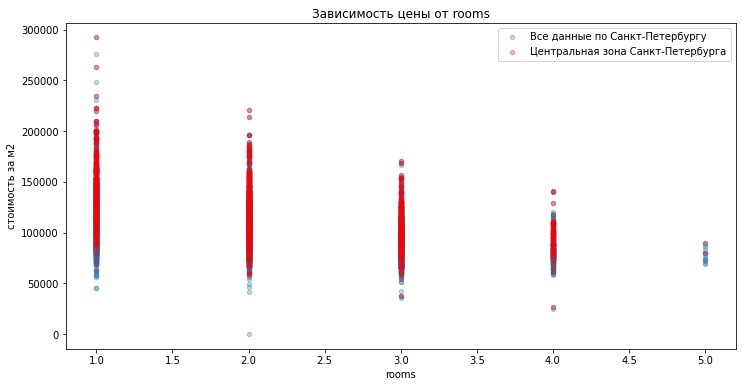

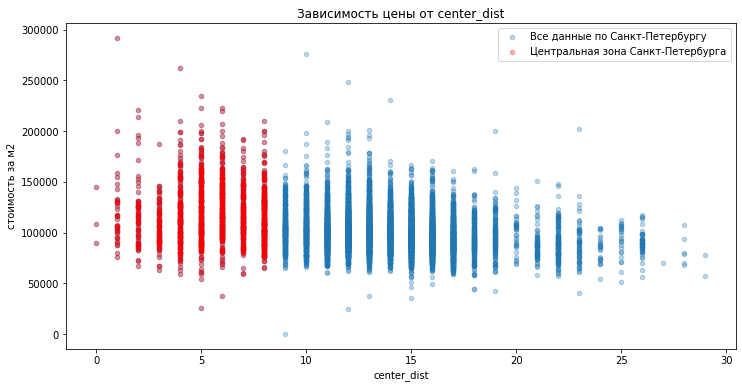

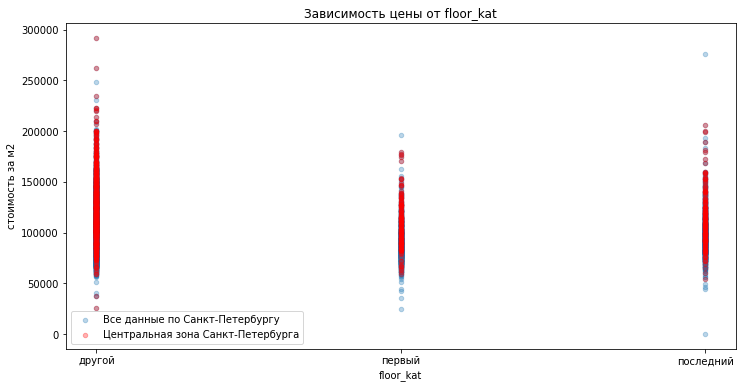

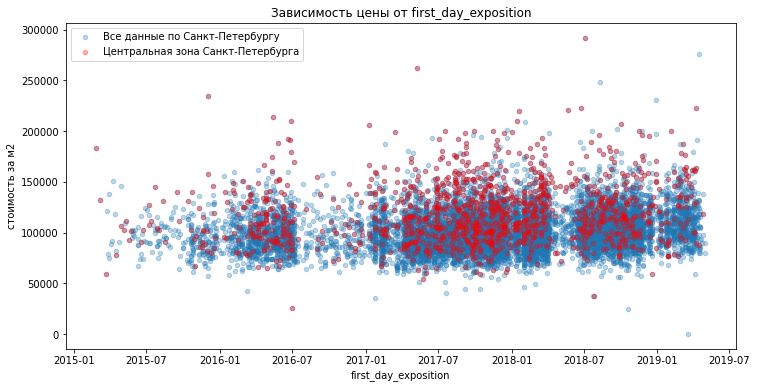

In [63]:
compare_cols = ['rooms', 'center_dist', 'floor_kat' ,'first_day_exposition']
for col in compare_cols:
    compare(col)

Квартиры в центральном районе и по всему городу имеют приблизительные зависимости центы от кол-ва комнат, этажности и даты размещения.   
В целом стоимость квартиры в центре выше чем по всему городу. Это видно на диаграмме по дням публикации.   
Самые дорогие квартиры на расстоянии 5-6 км от центра города.  
Также как и для всего города, чем больше комнат, тем меньше стоимость за м2.
Также первый и последний этаж не востребованы у покупателей.

## Общий вывод

* Средний срок продажи квартиры 123 дня, медиана - 78 дней.
* Самая популярная площадь квартиры  - 40-50 кв.м.
* Больше всего покупают одно- и двукомнатные квартиры.
* Цены на квартиры имеют прямую зависимость от площади квартиры, кол-ва комнат.
* Квартиры на первых и последих этажах имеют меньше всего спрос.
* Цена за квадратный метр уменьшается при увеличении количества комнат.
* Цены на квартиры имеют обратную зависимость от расстояния до центра.
* Большинство квартир в центре имеют потолки высотой 2,65 метра.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод